Example derived from: https://jckantor.github.io/CBE30338/03.05-One-Compartment-Pharmacokinetics.html

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.stats import truncnorm
from emu.meds import Levetiracetam, Lamotrigine, Pregabalin, DrugAdministration

PK data from:
https://pubmed.ncbi.nlm.nih.gov/33428169/

A simple pharmacokinetic model has the same form as a model for the dilution of a chemical species in a constant volume stirred-tank mixer. For a stirred-tank reactor with constant volume $V$, volumetric outlet flowrate $Q$, and inlet mass flow $u(t)$,

$$ \frac{dC}{dt} = \frac{1}{V}u(t) - \frac{Q}{V}C $$

where $C$ is concentration in units of mass per unit volume. $V$ is blood plasma volume or volume of distribution, $Q$ is the total body clearance rate

In [2]:
df = pd.read_csv('/Users/elijahc/data/emu/meds.2535.csv')
# df.to_csv('/Users/elijahc/data/emu/meds.2535.csv',index=False)

names = df.Med.unique().tolist()
dfs = [df.query('Med == "{}"'.format(n)) for n in df.Med.unique()]
basl = [1500,150,250]
meds = []
for c,d,b in zip([Levetiracetam,Pregabalin,Lamotrigine],dfs,basl):
    m = c.create_administration(doses=d.AMT,times=d.hour,weight=80)
    m.set_baseline(b,12)
    meds.append(m)

In [10]:
t = np.linspace(0,df.hour.max(),500)
Cp_norm = [pd.Series(d.C(t,normalize=True)).ewm(15).mean() for d in meds]
Cp = [pd.Series(d.C(t)) for d in meds]

In [11]:
aeds = pd.concat([pd.DataFrame({
    'Time (hrs)':t,
    'AED Load Index (%)':cn,
    'Concentration (mg/L)':cp,
    'name':n}) for cp,cn,n in zip(Cp,Cp_norm,names)]).reset_index().drop(columns='index')

Text(0.5, 1.0, 'AED Cp for Pt 2535')

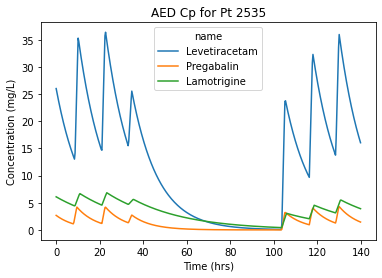

In [14]:
sns.lineplot(x='Time (hrs)',y='Concentration (mg/L)', hue='name',data=aeds)
plt.title('AED Cp for Pt 2535')

Text(0.5, 1.0, 'AED level relative to home regimen for Pt 2535')

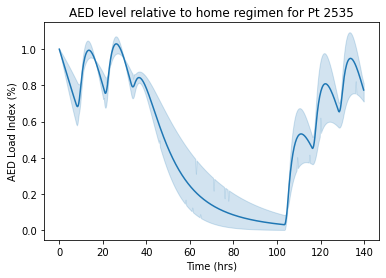

In [9]:
sns.lineplot(x='Time (hrs)',y='AED Load Index (%)',data=aeds,markers=True)
plt.title('AED level relative to home regimen for Pt 2535')